# Consensus clustering community detection
Reference: Lancichinetti, Andrea, and Santo Fortunato. "Consensus clustering in complex networks." _Scientific reports 2_ (2012): 336.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import igraph
import louvain
import numpy as np
import itertools
import pandas as pd
from nwtools import communities

Import Zachary karate club dataset [W. W. Zachary, An
information flow model for conflict and fission in small groups, Journal of
Anthropological Research 33, 452-473 (1977).]

In [2]:
g_karate = igraph.load('/media/sf_VBox_Shared/networks/karate/karate.gml')

In [3]:
g_law = igraph.load('/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/subnetwork/article_to_article_wgaansi.graphml')

In [4]:
list(g_karate.es)[:10]

[igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 3, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 4, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 5, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 6, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 7, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 8, {}),
 igraph.Edge(<igraph.Graph object at 0x7fab975f86d8>, 9, {})]

In [5]:
list(g_law.es)[:10]

[igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 0, {'Edge Label': '', 'weight': 5.0, 'id': '13849'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 1, {'Edge Label': '', 'weight': 5.0, 'id': '13850'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 2, {'Edge Label': '', 'weight': 6.0, 'id': '13851'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 3, {'Edge Label': '', 'weight': 5.0, 'id': '13852'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 4, {'Edge Label': '', 'weight': 5.0, 'id': '13853'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 5, {'Edge Label': '', 'weight': 10.0, 'id': '13854'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 6, {'Edge Label': '', 'weight': 5.0, 'id': '13855'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 7, {'Edge Label': '', 'weight': 7.0, 'id': '13856'}),
 igraph.Edge(<igraph.Graph object at 0x7fab64c586d8>, 8, {'Edge Label': '', 'weight': 6.0, 'id': '13857'}),
 igraph.Edge(<igraph.Graph 

Iteration 0
Smallest connected component: 34


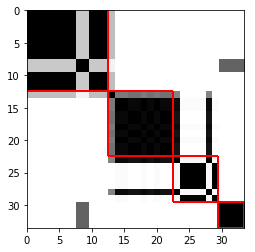

Iteration 1
Smallest connected component: 5


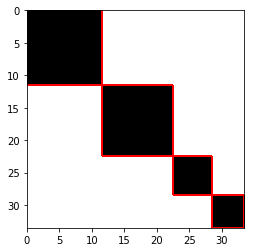

Converged!


In [6]:
cons1_karate, part1_karate = communities.consensus_partition(g_karate, verbose=True)

Iteration 0
Smallest connected component: 1


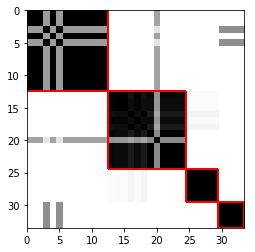

Iteration 1
Smallest connected component: 1


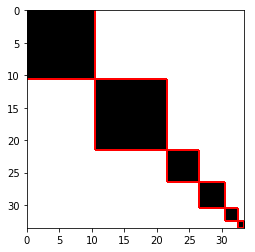

Converged!


In [7]:
cons2_karate, part2_karate = communities.consensus_partition(g_karate, threshold=0.9, verbose=True)

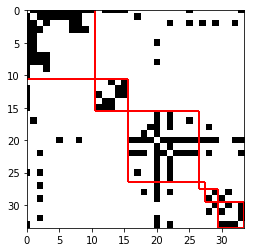

In [8]:
adj = np.array(g_karate.get_adjacency().data)
communities.plot_sorted_adjacency(adj, part2_karate)

In [10]:
cons1_law, partition1_law = communities.consensus_partition(g_law, threshold=0.9, weights='weight')

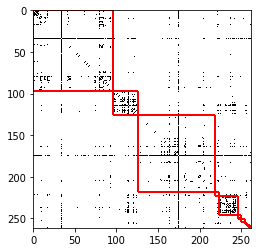

In [11]:
adj = np.array(g_law.get_adjacency().data)
communities.plot_sorted_adjacency(adj, partition1_law)

In [12]:
cons2_law, partition2_law = communities.consensus_partition(g_law, threshold=0, weights='weight')

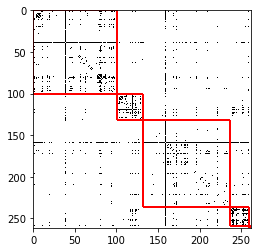

In [13]:
adj = np.array(g_law.get_adjacency().data)
communities.plot_sorted_adjacency(adj, partition2_law)

In [ ]:
g_law.vs['consensus'] = partition2_law

In [ ]:
g_law.write_graphml('/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/subnetwork/article_to_article_consensus.graphml')

In [ ]:
# To do: install fix 
igraph.plot(g_karate)